## Fhasion Mnist

En el siguiente [link](https://github.com/zalandoresearch/fashion-mnist) se puede encontrar información acerca del dataset que se utiliza en este caso práctico.

In [3]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(train_images, train_labels), (test_images,
                               test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Output: (60000, 28, 28)
train_images.shape

In [6]:
# Output: 60000
len(train_labels)

60000

In [7]:
# Output: (10000, 28, 28)
test_images.shape

(10000, 28, 28)

In [8]:
# Output: 10000
len(test_labels)

10000

In [9]:
# Output: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

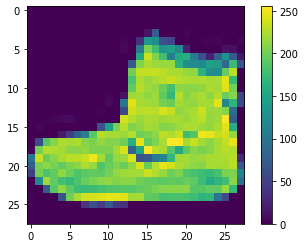

In [10]:
  plt.figure()
  plt.imshow(train_images[0])
  plt.colorbar()
  plt.grid(False)
  plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()   # Llama al constructor de la superclase
        self.flatten = nn.Flatten()  # Capa para aplanar los datos de entrada
        self.fc1 = nn.Linear(28*28, 512)  # Primera capa completamente conectada
        self.relu = nn.ReLU()  # Función de activación ReLU
        self.fc2 = nn.Linear(512, 10)  # Segunda capa completamente conectada
        self.softmax = nn.Softmax(dim=1)  # Función softmax para obtener la probabilidad de cada clase

    def forward(self, x):
        x = self.flatten(x)  # Aplana los datos de entrada
        x = self.fc1(x)  # Primera capa completamente conectada
        x = self.relu(x)  # Función de activación ReLU
        x = self.fc2(x)  # Segunda capa completamente conectada
        x = self.softmax(x)  # Función softmax para obtener la probabilidad de cada clase
        return x

model = Net()  # Instancia un objeto de la clase Net
print(model)  # Imprime la información del modelo




Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [15]:
# Definimos el criterio de pérdida y el optimizador
criterion = nn.CrossEntropyLoss() # Criterio de pérdida para clasificación multiclase
optimizer = optim.Adam(model.parameters()) # Optimizador Adam para actualizar los parámetros del modelo

# Entrenamos el modelo por 10 épocas
for epoch in range(10): 
# Por cada época, entrenamos el modelo con los datos de entrenamiento en lotes de 6000 elementos cada uno 
  for i in range(0, len(train_images), 6000): 

      # Obtenemos los lotes de datos para entrenamiento 
      batch_X = torch.Tensor(train_images[i:i+6000]).view(-1,28*28) # Tensor con los datos de imagenes 
      batch_y = torch.LongTensor(train_labels[i:i+6000]) # Tensor con las etiquetas correspondientes a las imagenes

      # Inicializamos los gradientes del optimizador a 0 antes de comenzar a entrenar el modelo con un lote 
      optimizer.zero_grad()

      # Realizamos la propagación hacia adelante para obtener las salidas del modelo 
      outputs = model(batch_X)

      # Calculamos la pérdida usando el criterio definido anteriormente 
      loss = criterion(outputs, batch_y)

      # Realizamos la propagación hacia atrás para calcular los gradientes y actualizar los parámetros del modelo  
      loss.backward()  
      optimizer.step()  

with torch.no_grad(): # Desactivamos la retropropagación para evaluar el modelo sin entrenarlo más 

   outputs = model(torch.Tensor(test_images).view(-1,28*28)) # Calculamso las salidas del modelo con los datos de prueba 

   _, predicted = torch.max(outputs.data, 1) # Obtenemso la clase predicha por el modelo para cada elemento en test data  

   correct = (predicted == torch.LongTensor(test_labels)).sum().item() # Calculamso cuantas predicciones fueron correctas  

print('\nTest loss:', loss.item()) # Imprimimso la pérdida en test data después de cada época  
print('\nTest accuracy:', correct/len(test_labels))




Test loss: 1.6641024351119995

Test accuracy: 0.7968


## Conclusión

Me ha resultado muy secillo encontrar información de esta libreria y poder ver que pasos hay que hacer en comparacion con el proceso de con keras.

En esta practica me he dado cuenta de la cantidad de cosas que se ha de hacer para cualquier cosa a diferencia de hacer el mismo proceso con la librería de Keras.